# Influence of conformations on subpockets

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd

from opencadd.databases.klifs import setup_remote
from opencadd.databases.klifs.utils import metadata_to_filepath
from opencadd.structure.pocket import PocketKlifs, PocketViewer

from utils import random_pockets

RDKit WARNING: [12:46:15] Enabling RDKit 2019.09.3 jupyter extensions
INFO:opencadd.databases.klifs.api:If you want to see an non-truncated version of the DataFrames in this module, use `pd.set_option('display.max_columns', 50)` in your notebook.


In [3]:
# Number of structures to be displayed
N_STRUCTURES = 3
# Seed for random generator
SEED = None

In [6]:
SUBPOCKET_NAMES = ["hinge_region", "dfg_region", "front_pocket"]
ANCHOR_RESIDUES = [[16, 47, 80], [19, 24, 81], [10, 48, 72]]

## Aim of this notebook

Check if our `kissim` subpockets are reasonable across different kinase conformations.

## Data retrieval (KLIFS structures)

In [4]:
session = setup_remote()

INFO:opencadd.databases.klifs.api:Set up remote session...
INFO:opencadd.databases.klifs.api:Remote session is ready!


In [5]:
structures = session.structures.all_structures()

Use random structures to calculate and visualize subpockets.

## Ung _et al._ conformations

BRAF structures in different conformations taken from [Ung _et al._ (2018)](https://www.sciencedirect.com/science/article/pii/S2451945618301491).

|             | aC-in        | aC-out       |
|-------------|--------------|--------------|
| __DFG-in__  | 2FB8 _CIDI_  | 4EHG _CODI_  |
| __DFG-out__ | 1UWH _CIDO_  | 4XV9 _CODO_  |

_Note_: KLIFS conformation annotation differs from Ung _et al._.

In [7]:
ung_pdb_ids = {"CIDI": "2FB8", "CODI": "4EHG", "CIDO": "1UWH", "CODO": "4XV9"}
print(ung_pdb_ids)
structure_klifs_ids = {
    i: session.structures.by_structure_pdb_id(j)
    .sample(random_state=SEED)
    .reset_index()["structure.klifs_id"][0]
    for i, j in ung_pdb_ids.items()
}
print(structure_klifs_ids)
subpockets = {
    "anchor_residue.klifs_ids": ANCHOR_RESIDUES,
    "subpocket.name": SUBPOCKET_NAMES,
    "subpocket.color": ["magenta", "cyan", "green"],
}
ung_pockets = []
for i, j in structure_klifs_ids.items():
    pocket = PocketKlifs.from_structure_klifs_id(j, subpockets, klifs_session=session)
    ung_pockets.append(pocket)

{'CIDI': '2FB8', 'CODI': '4EHG', 'CIDO': '1UWH', 'CODO': '4XV9'}
{'CIDI': 3086, 'CODI': 3078, 'CIDO': 3127, 'CODO': 6220}


INFO:opencadd.structure.pocket.core:Pocket 3078 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '85')]
INFO:opencadd.structure.pocket.core:Pocket 3078 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '85')]


In [8]:
viewer = PocketViewer()
for pocket in ung_pockets:
    viewer.add_pocket(pocket, sphere_opacity=1)
viewer.viewer

NGLWidget()

In [9]:
viewer.viewer.render_image(trim=True, factor=1, transparent=True);

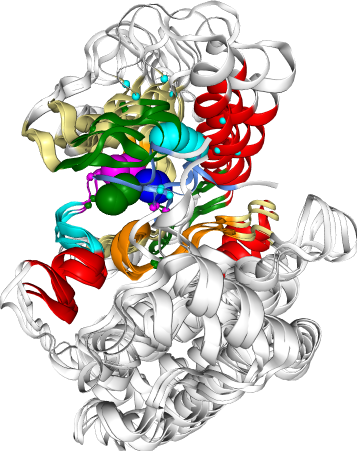

In [10]:
viewer.viewer._display_image()

<div class="alert alert-block alert-info">
Subpocket centers move w.r.t. to different conformations as expected.
</div>

## KLIFS conformations

### DFG conformations

> A 10-fold cross-validated decision tree model derived from systematic analysis of the Accessible Surface Area (ASA) (32) of kinase binding site residues and vectors defining the directionality of D<sup>xDFG.81</sup> and F<sup>xDFG.82</sup> side chains enable the automatic assessment of the DFG conformation of kinase structures with an accuracy > 99%. The decision tree algorithm identified the ASA values of D<sup>xDFG.81</sup> and y-values of D<sup>xDFG.81</sup> and F<sup>xDFG.82</sup> vectors (obtained by subtracting the coordinates of C$\gamma$ by C$\alpha$) as the most predictive descriptor combination for the discrimination of DFG conformations.

([_Nucleic Acids Res._ (2016), __44__, 6, D365–D371](https://doi.org/10.1093/nar/gkv1082))

In [11]:
pockets_by_dfg = {
    "in": random_pockets(
        structures[(structures["structure.dfg"] == "in")],
        N_STRUCTURES,
        SEED,
        ANCHOR_RESIDUES,
        SUBPOCKET_NAMES,
        ["magenta", "cyan", "green"],
        session,
    ),
    "out": random_pockets(
        structures[(structures["structure.dfg"] == "out")],
        N_STRUCTURES,
        SEED,
        ANCHOR_RESIDUES,
        SUBPOCKET_NAMES,
        ["violet", "cadetblue", "olive"],
        session,
    ),
}

|    | name         | anchors      | color   |
|---:|:-------------|:-------------|:--------|
|  0 | hinge_region | [16, 47, 80] | magenta |
|  1 | dfg_region   | [19, 24, 81] | cyan    |
|  2 | front_pocket | [10, 48, 72] | green   |

Structure KLIFS ID: 10705


INFO:opencadd.structure.pocket.core:Pocket 10705 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '50'), ('_', '57'), ('_', '58')]
INFO:opencadd.structure.pocket.core:Pocket 10705 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '50')]
INFO:opencadd.structure.pocket.core:Pocket 10705 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '57'), (None, '58')]


Structure KLIFS ID: 658


INFO:opencadd.structure.pocket.core:Pocket 658 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '50')]
INFO:opencadd.structure.pocket.core:Pocket 658 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '50')]


Structure KLIFS ID: 4712


INFO:opencadd.structure.pocket.core:Pocket 4712 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '50')]
INFO:opencadd.structure.pocket.core:Pocket 4712 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '50')]


|    | name         | anchors      | color     |
|---:|:-------------|:-------------|:----------|
|  0 | hinge_region | [16, 47, 80] | violet    |
|  1 | dfg_region   | [19, 24, 81] | cadetblue |
|  2 | front_pocket | [10, 48, 72] | olive     |

Structure KLIFS ID: 12281
Structure KLIFS ID: 10360
Structure KLIFS ID: 10025


INFO:opencadd.structure.pocket.core:Pocket 10025 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '84'), ('_', '85')]
INFO:opencadd.structure.pocket.core:Pocket 10025 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '84'), (None, '85')]


In [12]:
viewer = PocketViewer()
for _, pockets in pockets_by_dfg.items():
    for pocket in pockets:
        viewer.add_pocket(pocket, sphere_opacity=1)
        component = list(viewer._components_structures.values())[-1]
        color = pocket.subpockets.set_index("subpocket.name")["subpocket.color"]["dfg_region"]
        pocket_residues = " ".join([str(i) for i in pocket._residue_ids])
        viewer.viewer.clear_representations(component=component)
        viewer.viewer.add_representation(
            repr_type="cartoon",
            selection=pocket_residues,
            component=component,
            color=color,
            opacity=0.5,
        )
viewer.viewer

NGLWidget()

In [13]:
viewer.viewer.render_image(trim=True, factor=1, transparent=True);

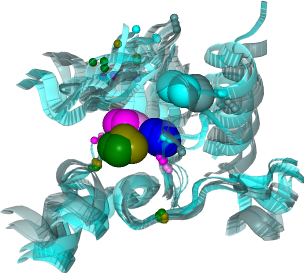

In [14]:
viewer.viewer._display_image()

<div class="alert alert-block alert-info">
Subpocket centers move w.r.t. to DFG-in (cyan) and DFG-out (grey blue) as expected.
</div>

### $\alpha$C-helix conformation

> Distance between the Ca atoms of residue D<sup>xDFG.81</sup> and conserved residue E<sup>αC.24</sup>.
>  * $\alpha$C-in: $[4, 7.2]$
>  * $\alpha$C-out: $>9.3$
>  * $\alpha$C-out-like: $[7.2, 9.3]$

([_J. Med. Chem._ (2014), __57__, 2, 249-277](https://pubs.acs.org/doi/abs/10.1021/jm400378w))

In [15]:
pockets_by_achelix = {
    "in": random_pockets(
        structures[
            (structures["structure.dfg"] == "in") & (structures["structure.ac_helix"] == "in")
        ],
        N_STRUCTURES,
        SEED,
        ANCHOR_RESIDUES,
        SUBPOCKET_NAMES,
        ["magenta", "cyan", "green"],
        session,
    ),
    "out": random_pockets(
        structures[
            (structures["structure.dfg"] == "in") & (structures["structure.ac_helix"] == "out")
        ],
        N_STRUCTURES,
        SEED,
        ANCHOR_RESIDUES,
        SUBPOCKET_NAMES,
        ["violet", "cadetblue", "olive"],
        session,
    ),
}

|    | name         | anchors      | color   |
|---:|:-------------|:-------------|:--------|
|  0 | hinge_region | [16, 47, 80] | magenta |
|  1 | dfg_region   | [19, 24, 81] | cyan    |
|  2 | front_pocket | [10, 48, 72] | green   |

Structure KLIFS ID: 11512


INFO:opencadd.structure.pocket.core:Pocket 11512 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '6'), ('_', '7'), ('_', '8'), ('_', '50')]
INFO:opencadd.structure.pocket.core:Pocket 11512 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '6'), (None, '7'), (None, '8')]
INFO:opencadd.structure.pocket.core:Pocket 11512 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '50')]


Structure KLIFS ID: 12100
Structure KLIFS ID: 8647


|    | name         | anchors      | color     |
|---:|:-------------|:-------------|:----------|
|  0 | hinge_region | [16, 47, 80] | violet    |
|  1 | dfg_region   | [19, 24, 81] | cadetblue |
|  2 | front_pocket | [10, 48, 72] | olive     |

Structure KLIFS ID: 11184


INFO:opencadd.structure.pocket.core:Pocket 11184 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '50')]
INFO:opencadd.structure.pocket.core:Pocket 11184 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '50')]


Structure KLIFS ID: 8001
Structure KLIFS ID: 11207


INFO:opencadd.structure.pocket.core:Pocket 11207 (set pocket residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [('_', '50')]
INFO:opencadd.structure.pocket.core:Pocket 11207 (set region residues): The following input residues were dropped because they cannot be cast to an integer (residue PDB ID, residue index): [(None, '50')]


In [16]:
viewer = PocketViewer()
for _, pockets in pockets_by_achelix.items():
    for pocket in pockets:
        viewer.add_pocket(pocket, sphere_opacity=1)
        component = list(viewer._components_structures.values())[-1]
        color = pocket.subpockets.set_index("subpocket.name")["subpocket.color"]["dfg_region"]
        pocket_residues = " ".join([str(i) for i in pocket._residue_ids])
        viewer.viewer.clear_representations(component=component)
        viewer.viewer.add_representation(
            repr_type="cartoon",
            selection=pocket_residues,
            component=component,
            color=color,
            opacity=0.5,
        )
viewer.viewer

NGLWidget()

In [17]:
viewer.viewer.render_image(trim=True, factor=1, transparent=True);

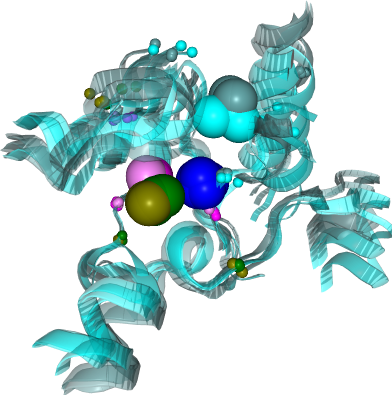

In [18]:
viewer.viewer._display_image()

<div class="alert alert-block alert-info">
Subpocket centers change only slightly w.r.t. to aC-in (cyan) and aC-out (grey blue) conformations.
</div>

## Discussion

The aim of this notebook was to check how the subpocket centers change w.r.t. to different conformations (DFG/$\alpha$C-helix) for random structures. 

We observed that the different DFG-conformations do have an influence on the subpocket center location - in the DFG-out conformation the "DFG-region" subpocket shifts a bit to the back as desired. The influence of the $\alpha$C-helix conformations are not as pronounced - as to be expected.

The other subpockets are only slightly affected by the conformations, which is to be expected and wanted.

So overall, we are content with the subpocket center locations depending on structure conformations.